<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Sidoney_Daley_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import math
import numpy as np
import pandas as pd

## MEAN


In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

total_sales = sum(sales)

total_sales


21369

In [0]:
mean_sales = total_sales/len(sales)

mean_sales

3052.714285714286

## VARIANCE


In [0]:
lambda x: x-mean_sales

<function __main__.<lambda>>

In [0]:
sales_diff_mean = list(map(lambda x: x-mean_sales, sales))
sales_diff_mean

[452.2857142857142,
 -652.7142857142858,
 -25.71428571428578,
 -254.71428571428578,
 647.2857142857142,
 197.28571428571422,
 -363.7142857142858]

In [0]:
squared_sales_diff_mean = list(map(lambda x: x**2,sales_diff_mean ))
squared_sales_diff_mean

[204562.36734693873,
 426035.9387755103,
 661.2244897959217,
 64879.36734693881,
 418978.7959183673,
 38921.65306122446,
 132288.0816326531]

In [0]:
length_saleslist = len(squared_sales_diff_mean)-1  # for sample taken from population
length_saleslist = len(squared_sales_diff_mean)    # for whole population
length_saleslist

7

In [0]:
variance_sales = sum(squared_sales_diff_mean)/length_saleslist
variance_sales

183761.06122448976

In [0]:
print('{:.2f}'.format(variance_sales,3))

183761.06


## STANDARD DEVIATION

In [0]:
print('{:.2f}'.format(math.sqrt(variance_sales)))
print('{:.2f}'.format(np.sqrt(variance_sales)))

428.67
428.67


In [0]:
# check using numpy
print(np.mean(sales))
print('{:.2f}'.format(np.var(sales)))
print('{:.2f}'.format(np.std(sales)))

3052.714285714286
183761.06
428.67


In [0]:
# check using pandas
salesdf = pd.DataFrame({"sales": sales})
print('mean_sales:', salesdf['sales'].mean())

mean_sales: 3052.714285714286


In [0]:
# for population
print('var:','{:.2f}'.format(salesdf['sales'].var(ddof=0)))
print('std:', '{:.2f}'.format(salesdf['sales'].std(ddof=0)))

var: 183761.06
std: 428.67


In [0]:
# for a sample
print('var:','{:.2f}'.format(salesdf['sales'].var(ddof=1)))
print('std:', '{:.2f}'.format(salesdf['sales'].std(ddof=1)))

var: 214387.90
std: 463.02


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

## COVARIANCE

In [0]:
cust = [127, 80, 105, 92, 120, 115, 93]
cust

[127, 80, 105, 92, 120, 115, 93]

In [0]:
# using numpy
print('{:.2f}'.format(np.cov(sales, cust)[0][1]))

7604.36


In [0]:
# using pandas
salesdf['cust'] = pd.Series(cust)
print('{:.2f}'.format(salesdf.cov().values[0][1]))

7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

## CORRELATION


In [0]:
salesdf.corr()

,sales,cust
sales,1.000000,0.962834
cust,0.962834,1.000000


In [0]:
# calc standard deviation of sales & cust using pandas
standev_sales = salesdf['sales'].std(ddof=1)
standev_cust = salesdf['cust'].std(ddof=1)
print('{:.4f}'.format(standev_sales))
print('{:.4f}'.format(standev_cust))

463.0204
17.0573


In [0]:
# calc covariance using pandas
cov_sales = salesdf['sales'].cov(salesdf['cust'])
print('{:.4f}'.format(cov_sales))

7604.3571


In [0]:
denom = standev_sales*standev_cust
denom

7897.890309308459

In [0]:
corr_sales = cov_sales/denom
corr_sales

0.9628339778148909

In [0]:
print('{:.6f}'.format(corr_sales))

0.962834


In [0]:
print('{:.6f}'.format(salesdf['sales'].corr(salesdf['cust'])))

0.962834


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

In [0]:
titanic = pd.read_csv(url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
titanic.corr()


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
vec1 = [0,2]
vec2 = [2,0]

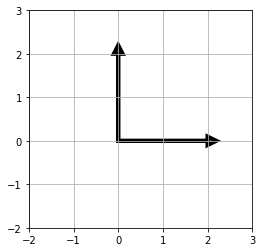

In [0]:

fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-2,3)          
plt.ylim(-2,3)

# Plot the vectors
for vect in [vec1, vec2]:
    plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

Orthogonal = right-angled

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a,b)

-40

a and b are not orthogonal because their product does not equal zero 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2,-15,6,20])
c

array([  2, -15,   6,  20])

In [0]:
norm_c = np.linalg.norm(c)
print(c, "\n Norm of c:", norm_c)
norm_c

[  2 -15   6  20] 
 Norm of c: 25.787593916455254


25.787593916455254

In [0]:
print("Dot Product:", np.dot(norm_c,norm_c))

Dot Product: 665.0


In [0]:
print("Dot Product:", np.dot(c,c))

Dot Product: 665


In [0]:
c.T

array([  2, -15,   6,  20])

In [0]:
print("Dot Product:", np.dot(c.T,c))

Dot Product: 665


All quantities equal the same value

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [0]:
d = np.array([7, 12])
e = np.array([2, 11, -8])

In [0]:
d_hat = d/np.linalg.norm(d)
print(d_hat)

[0.50387103 0.8637789 ]


In [0]:
e_hat = e/np.linalg.norm(e)
print(e_hat)

[ 0.14547859  0.80013226 -0.58191437]


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
f

array([ 4, 12, 11,  9,  2])

In [0]:
f_hat = f/np.linalg.norm(f)
print(f_hat)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
vect = np.array([1, 2, 3])
vect1 = np.multiply(vect, 2)
print(vect, '\n', vect1 )

[1 2 3] 
 [2 4 6]


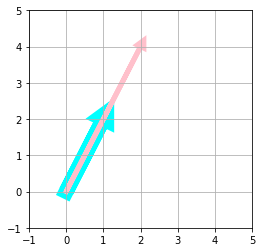

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,5)          
plt.ylim(-1,5)

for myvect, mycolor, width in [(vect, 'cyan', 15), (vect1, 'pink', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

In [0]:
vect2 = np.random.randint(low=-5, high=5, size=2)
vect3 = np.random.randint(low=-5, high=5, size=2)
print(vect2, '\n', vect3)

[-1  0] 
 [ 3 -4]


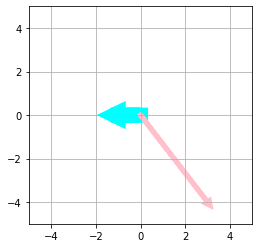

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Plot the vectors
for myvect, mycolor, width in [(vect2, 'cyan', 15), (vect3, 'pink', 5)]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=width, 
              color=mycolor)

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1, 2])
h = np.array([4, 8])

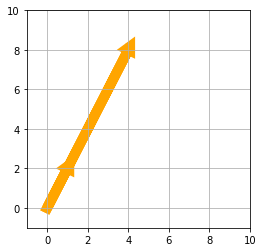

In [0]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,10)          
plt.ylim(-1,10)

# Display
for myvect in [g, h]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='orange')

In [0]:
a,b=(2,4)
linear_combo= np.multiply(g, a) + np.multiply(h, b) 
print(linear_combo)

[18 36]


In [0]:
several_combos=[]
for (a,b) in [(0,0), (2,4), (4,8)]:
    linear_combo = np.multiply(g, a) + np.multiply(h, b) 
    several_combos.append(linear_combo)
print(several_combos)

[array([0, 0]), array([18, 36]), array([36, 72])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = np.array([1,2,3,])
m = np.array([-1, 0, 7])
n = np.array([4,8, 2])

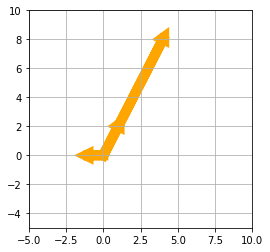

In [0]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,10)          
plt.ylim(-5,10)

# Display
for myvect in [l, m, n]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=10, 
              color='orange')

In [0]:
a,b,c =(0,2,4)
linear_combos= np.multiply(l, a) + np.multiply(m, b) + np.multiply(n, c)
print(linear_combos)

[14 32 22]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



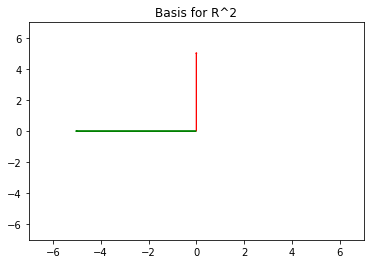

In [0]:
vects1 = [0, 5]
vects2 = [-5, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vects1[0], vects1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vects2[0], vects2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-7,7)          
plt.ylim(-7,7)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

Basis is a subset of vectors within the space that are linearly independent and span the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
p = np.array([[1,2,3],[-1,0,7],[4,8,2]])
p


array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [0]:
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

The maximum number of linearly independent column vectors in the matrix (a) or the maximum number of linearly independent row vectors in the matrix (b)

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = np.array([1,3])
w = np.array([-1,2])

In [0]:
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [0]:
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


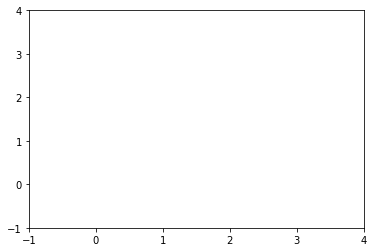

In [0]:
plt.xlim(-1,4)          
plt.ylim(-1,4)
axes = plt.gca()

In [0]:
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


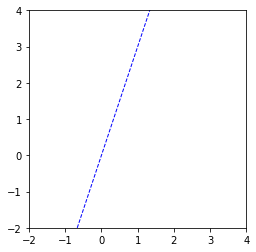

In [0]:
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

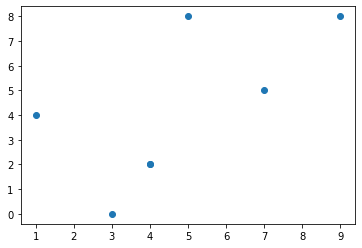

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()